# Heston Model Simulation

In [1]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt

# Mô hình Heston – Stochastic Volatility Model

Mô hình Heston mô phỏng giá tài sản tài chính có phương sai không cố định mà thay đổi theo thời gian (stochastic volatility).  
So với mô hình Black–Scholes (volatility cố định), Heston phản ánh thị trường thực tế tốt hơn, Heston cho phép:
- \( v_t \): phương sai là quá trình stochastic.

## Hệ SDE của mô hình:


\begin{aligned}
dS_t &= \mu S_t dt + \sqrt{v_t} S_t dW_1(t) \\
dv_t &= \kappa(\theta - v_t) dt + \sigma \sqrt{v_t} dW_2(t) \\
\text{với } dW_1 dW_2 = \rho dt
\end{aligned}


Trong đó:
- $ \mu $: tỷ suất sinh lợi kỳ vọng
- $ \kappa $: tốc độ hồi về trung bình
- $ \theta $: phương sai dài hạn
- $ \sigma $: độ biến động phương sai (vol-of-vol)
- $ \rho $: tương quan giữa 2 nhiễu Brownian

In [2]:
# Hàm mô phỏng Heston
def heston_simulate(S0, v0, mu, kappa, theta, sigma, rho, T, N, M):
    """
    Mô phỏng mô hình Heston bằng phương pháp Euler–Maruyama

    Tham số:
    - S0: giá ban đầu
    - v0: phương sai ban đầu
    - mu: lợi suất kỳ vọng
    - kappa: tốc độ hồi về trung bình
    - theta: phương sai dài hạn
    - sigma: độ biến động phương sai
    - rho: hệ số tương quan giữa 2 nhiễu
    - T: thời gian mô phỏng (năm)
    - N: số bước thời gian
    - M: số đường mô phỏng

    Trả về:
    - S: ma trận giá cổ phiếu (M x (N+1))
    - v: ma trận phương sai (M x (N+1))
    """
    dt = T / N
    S = np.zeros((M, N + 1))
    v = np.zeros((M, N + 1))
    S[:, 0] = S0
    v[:, 0] = v0

    for t in range(1, N + 1):
        Z1 = np.random.normal(0, 1, M)
        Z2 = np.random.normal(0, 1, M)
        W1 = Z1
        W2 = rho * Z1 + np.sqrt(1 - rho ** 2) * Z2

        # Sử dụng Euler–Maruyama cho v_t và S_t
        v[:, t] = np.maximum(v[:, t-1] + kappa*(theta - v[:, t-1])*dt + sigma*np.sqrt(np.maximum(v[:, t-1], 0))*np.sqrt(dt)*W2, 0)
        S[:, t] = S[:, t-1] * np.exp((mu - 0.5*v[:, t-1])*dt + np.sqrt(np.maximum(v[:, t-1], 0))*np.sqrt(dt)*W1)

    return S, v

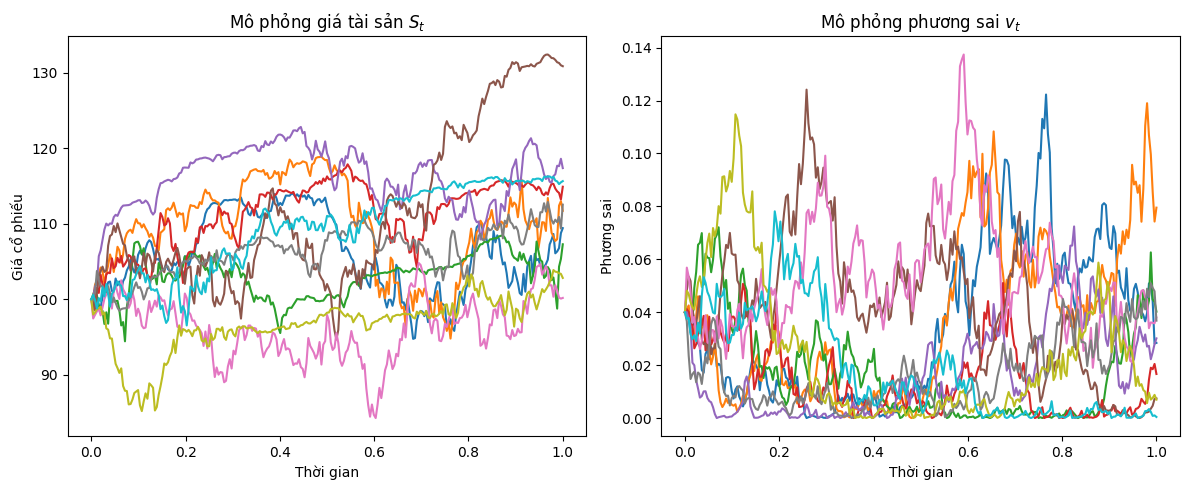

In [6]:
# Khởi tạo tham số và chạy mô phỏng
S0 = 100
v0 = 0.04
mu = 0.05
kappa = 2.0
theta = 0.04
sigma = 0.5
rho = -0.7
T = 1.0     # 1 năm
N = 252     # số bước thời gian (giả định 252 ngày giao dịch)
M = 100     # số đường mô phỏng

S_paths, v_paths = heston_simulate(S0, v0, mu, kappa, theta, sigma, rho, T, N, M)

# Vẽ kết quả mô phỏng
time = np.linspace(0, T, N + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, S_paths[:10].T)
plt.title('Mô phỏng giá tài sản $S_t$')
plt.xlabel('Thời gian')
plt.ylabel('Giá cổ phiếu')

plt.subplot(1, 2, 2)
plt.plot(time, v_paths[:10].T)
plt.title('Mô phỏng phương sai $v_t$')
plt.xlabel('Thời gian')
plt.ylabel('Phương sai')

plt.tight_layout()
plt.show()

## 📈 Định giá quyền chọn châu Âu bằng Monte Carlo trên mô hình Heston

In [15]:

# Định giá quyền chọn châu Âu bằng Monte Carlo sử dụng mô phỏng Heston
def european_call_price_mc(S_paths, K, r, T):
    """
    Định giá quyền chọn mua châu Âu từ các đường mô phỏng giá tài sản.

    Tham số:
    - S_paths: ma trận mô phỏng giá tài sản (M x N+1)
    - K: giá thực hiện
    - r: lãi suất phi rủi ro
    - T: thời gian đáo hạn

    Trả về:
    - Giá quyền chọn mua
    """
    S_T = S_paths[:, -1]
    payoff = np.maximum(S_T - K, 0)
    price = np.exp(-r * T) * np.mean(payoff)
    return price

# Định giá thử
K = 100  # Strike price
r = 0.05  # Lãi suất phi rủi ro

call_price = european_call_price_mc(S_paths, K, r, T)
print(f"💰 Giá quyền chọn mua châu Âu (MC - Heston): {call_price:.4f}")

💰 Giá quyền chọn mua châu Âu (MC - Heston): 11.6471


## Kết luận

- Mô hình Heston cho phép mô phỏng giá tài sản với phương sai thay đổi.
- Phương pháp Euler–Maruyama được dùng để giải SDE.
- Kết quả mô phỏng cho thấy sự “clustering” của volatility – điều không thể thấy trong mô hình Black–Scholes.
- Có thể áp dụng mô phỏng này cho định giá quyền chọn hoặc các chiến lược kiểm định nâng cao như Importance Sampling (IS).

---------------------------------------------------------

In [ ]:
import project_gtnn.simulate.heston_simulation as hs
# Import file heston_simulation.py

# Sử dụng các hàm từ file đã import
S0 = 100
v0 = 0.04
mu = 0.05
kappa = 2.0
theta = 0.04
sigma = 0.5
rho = -0.7
T = 1.0     # 1 năm
N = 252     # số bước thời gian (giả định 252 ngày giao dịch)
M = 100     # số đường mô phỏng
K = 100     # Giá thực hiện
r = 0.05    # Lãi suất phi rủi ro

# Mô phỏng Heston
S_paths, v_paths = hs.heston_simulate(S0, v0, mu, kappa, theta, sigma, rho, T, N, M)

# Định giá quyền chọn mua châu Âu
call_price = hs.price_european_call(S_paths, K, r, T)
print(f"💰 Giá quyền chọn mua châu Âu (MC - Heston): {call_price:.4f}")

💰 Giá quyền chọn mua châu Âu (MC - Heston): 10.1215
